In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [4]:
#loading the dataset
df = pd.read_csv("cardio_train.csv")
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [5]:
#describing the dataset
#get number of rows and columns
df.shape

(70000, 13)

In [6]:
#counts of people with and without cardio
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

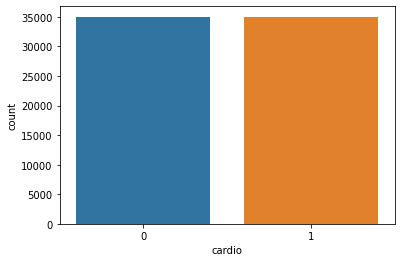

In [7]:
#visualize cardio 
seaborn.countplot(df['cardio'])

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#getting the statistics of the data
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [11]:
#check for null values
df.isna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#separating data and labels
X = df.drop(['cardio'], axis = 1)
y = df['cardio']

In [13]:
print(X)
print(y)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0         

In [14]:
#data standardization
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [15]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-1.73208045 -0.43606151  1.36405487 ... -0.31087913 -0.23838436
   0.49416711]
 [-1.73204579  0.30768633 -0.73310834 ... -0.31087913 -0.23838436
   0.49416711]
 [-1.73201113 -0.24799666 -0.73310834 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [ 1.7338537  -0.16328642  1.36405487 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.73392303  1.20058905 -0.73310834 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 1.73395769  0.43414373 -0.73310834 ... -0.31087913 -0.23838436
   0.49416711]]


In [16]:
X = standardized_data
y = df['cardio']

In [17]:
print(X,y)

[[-1.73208045 -0.43606151  1.36405487 ... -0.31087913 -0.23838436
   0.49416711]
 [-1.73204579  0.30768633 -0.73310834 ... -0.31087913 -0.23838436
   0.49416711]
 [-1.73201113 -0.24799666 -0.73310834 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [ 1.7338537  -0.16328642  1.36405487 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.73392303  1.20058905 -0.73310834 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 1.73395769  0.43414373 -0.73310834 ... -0.31087913 -0.23838436
   0.49416711]] 0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


In [18]:
#split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [19]:
#print the shapes of the new objects
print(X.shape,X_train.shape,X_test.shape,y.shape,y_train.shape,y_test.shape)

(70000, 12) (63000, 12) (7000, 12) (70000,) (63000,) (7000,)


In [20]:
#training random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

#accuracy score
model.score(X_test, y_test)

0.732

In [21]:
#training decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

#accuracy score
classifier.score(X_test, y_test)

0.6381428571428571

In [22]:
#making a predictive system
input_data = (52,23388,2,162,72,130,80,1,1,1,0,1)
#changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data) 
print(prediction)

if (prediction[0] == 0):
    print('The person has no Cardio vascular diseases')
else:
    print('The person has Cardio vascular diseases' )

[[-1.7302781   1.58847281  1.36405487 -0.28735799 -0.15321916  0.00767945
  -0.0882385  -0.5393221  -0.39571994  3.2166843  -0.23838436  0.49416711]]
[1]
The person has Cardio vascular diseases


In [23]:
#dump the model into a pickle file
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']